In [1]:
%load_ext autoreload
%autoreload 2

import sys
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join

config_dir = "../../config"
if config_dir not in sys.path:
    sys.path.insert(0, config_dir)

from config import add_to_path, root_dir, google_folder_id, download_dir
add_to_path(join(root_dir, 'src'))
import utils.visualization as visualisation
import utils.preprocessing as preprocessing
from data_loader import load_data


Added to sys: c:\Users\fauli\OneDrive\Bureau\INSA\quatrième_année\deuxieme_semestre\projet recheche\library\Projet-recheche-INSA-anomaly-detection-librairy-1\src


In [2]:
data_dict, extracted_dir = load_data(
    file_id=google_folder_id,
    work_dir=join(download_dir, "gdrive_tar_data"),
    tar_name="data.tar",
    pattern="*.csv",
)

list_keys = list(data_dict.keys())
df = data_dict[list_keys[2]]
df = preprocessing.clean_dataframe(df)


In [3]:
df.columns

Index(['datetime', 'nwl1', 'nwl2', 'nwl3', 'nwl4', 'fprd1', 'fprd2', 'fprd3',
       'fprd4', 'pstr1', 'pstr3', 'astrw', 'g2', 'ny', 'vcrf', 'v2',
       'time_real'],
      dtype='object')

Then we test the ploting on all the columns of the dataframe in fonction of the time (time_real) except "datetime" and "real_time" because there is no interest

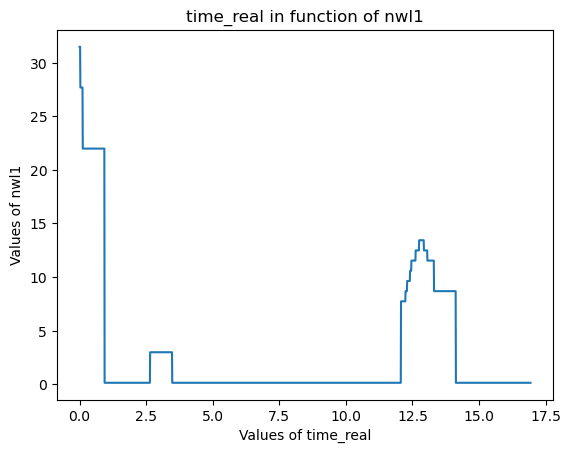

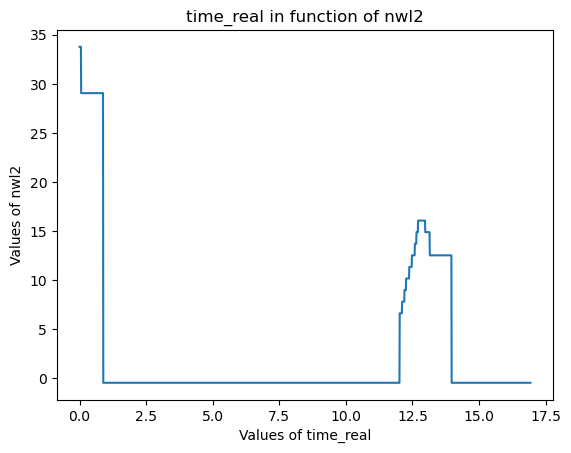

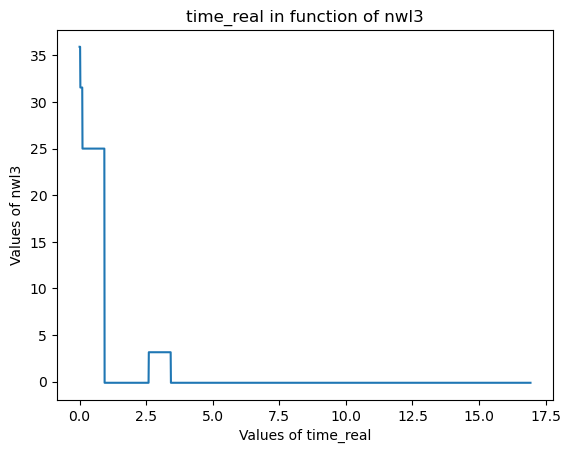

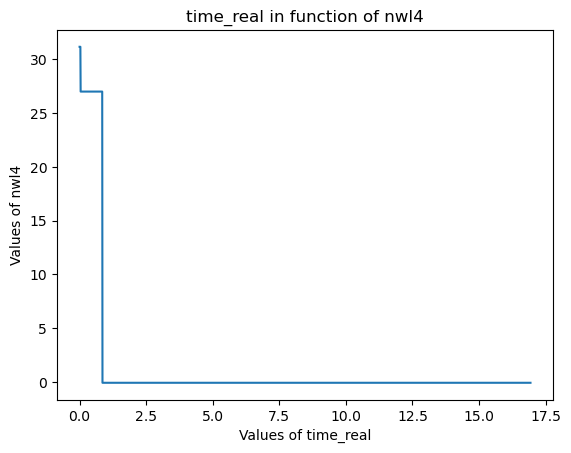

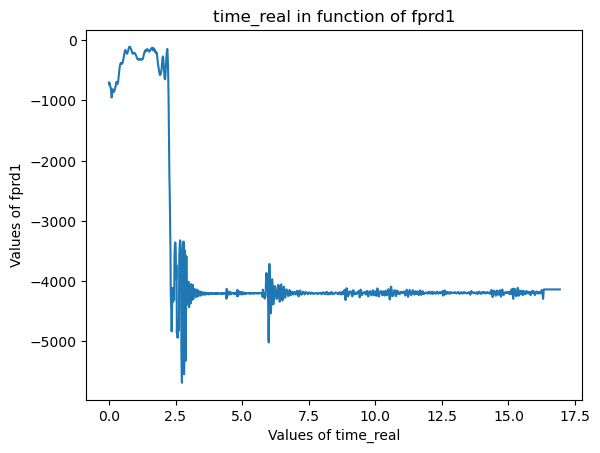

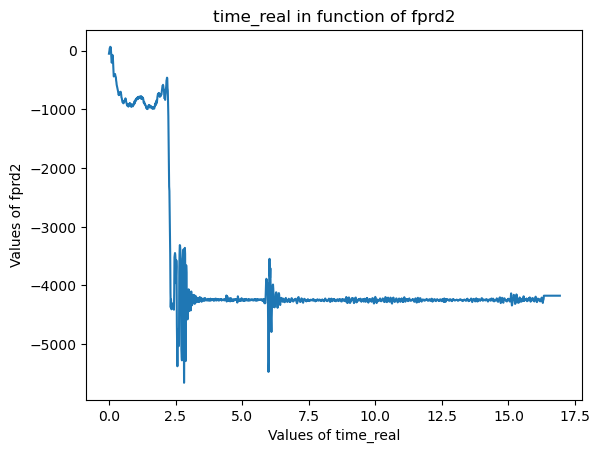

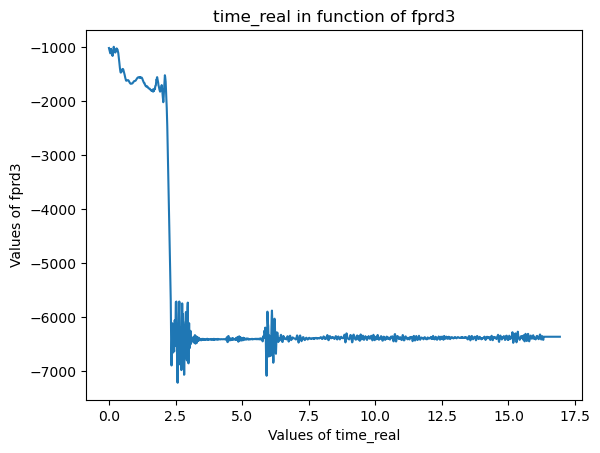

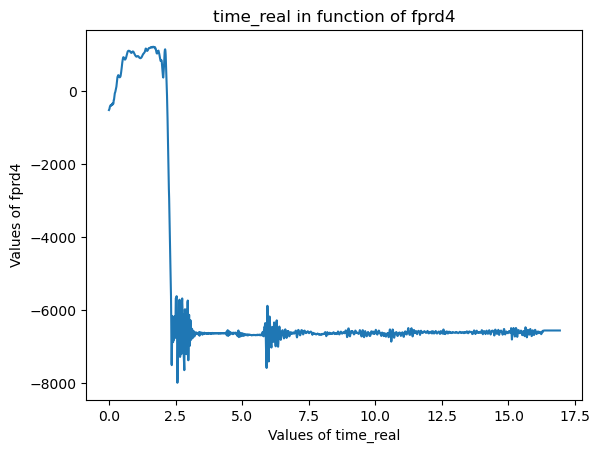

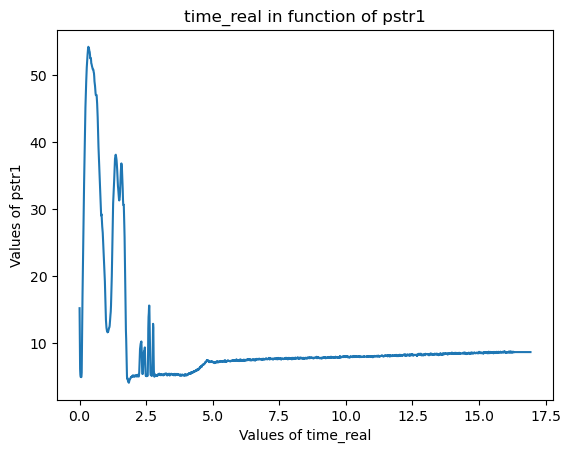

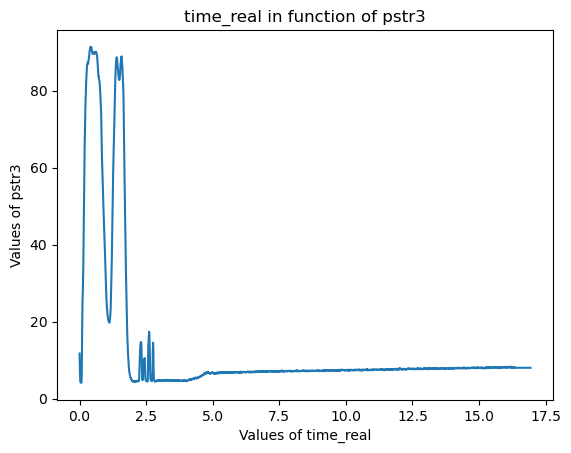

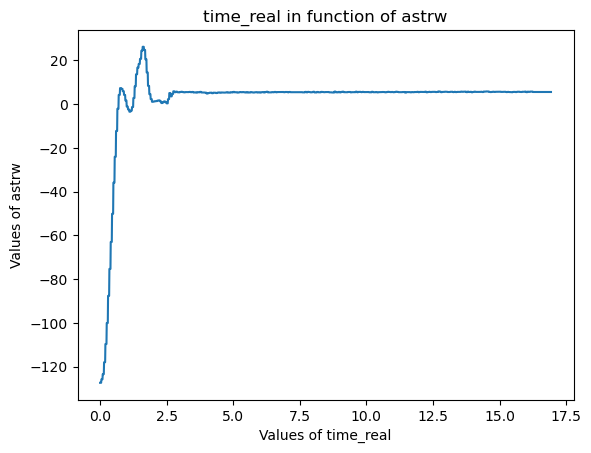

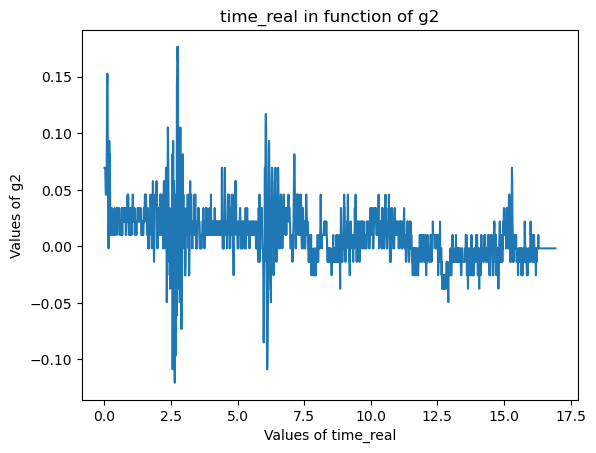

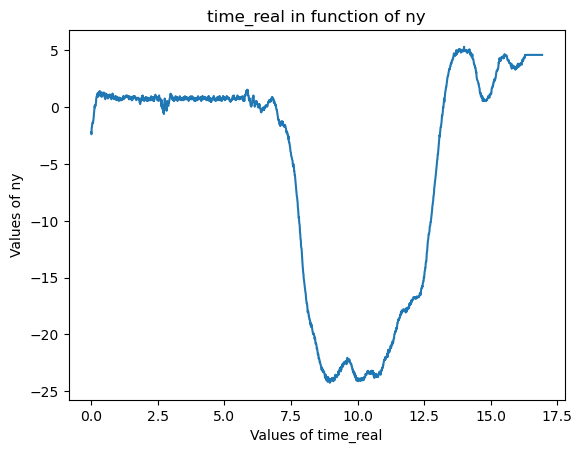

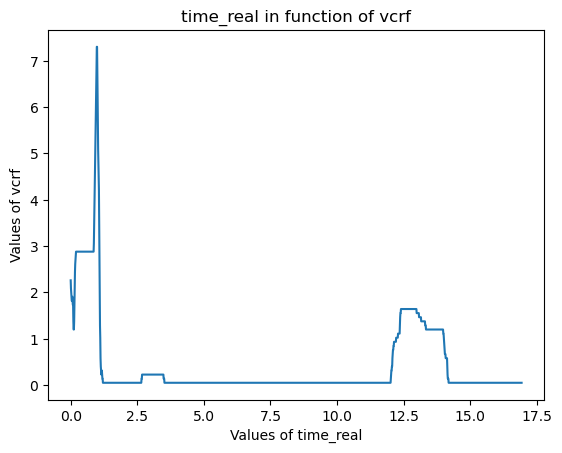

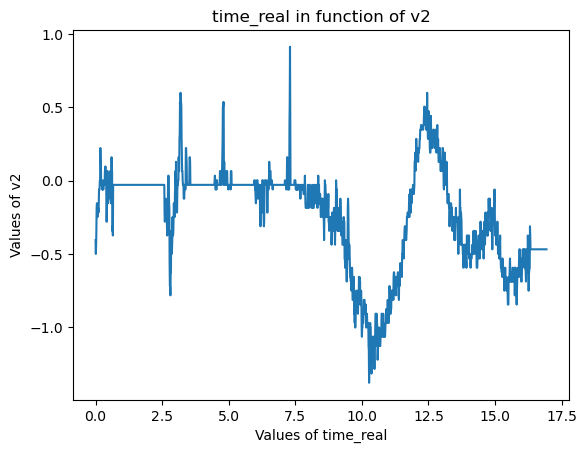

In [4]:

for i in df.columns[1:-1] :
    visualisation.plot(df,"time_real",i)

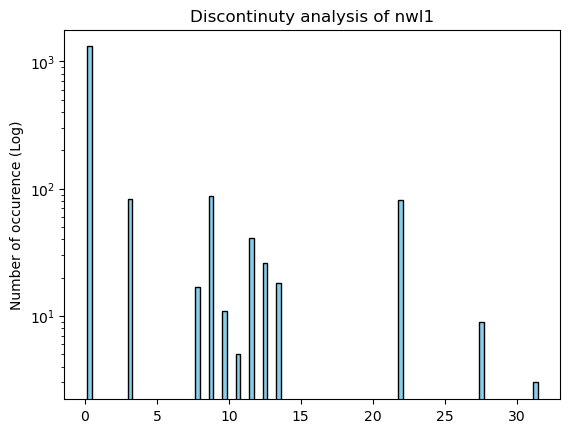

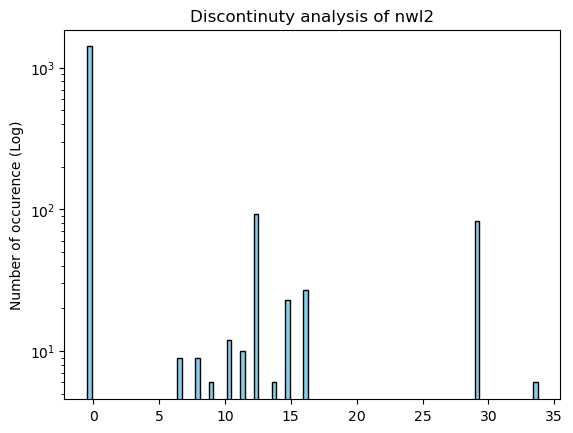

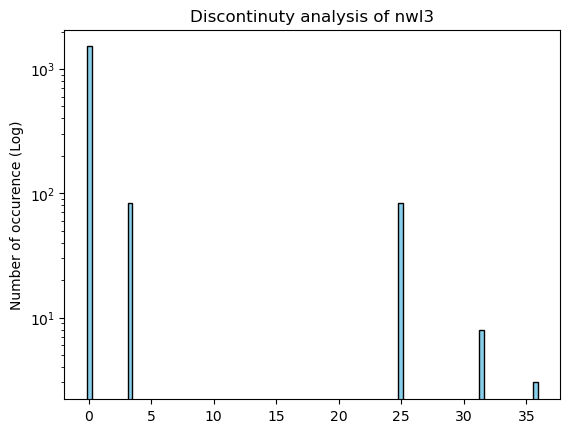

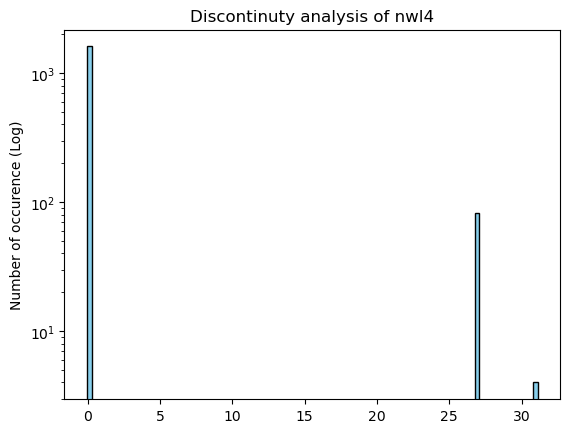

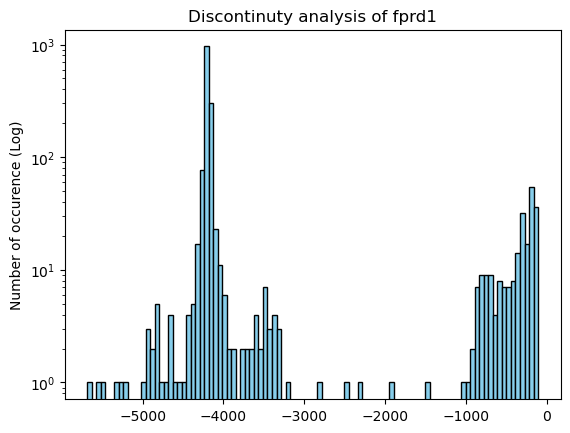

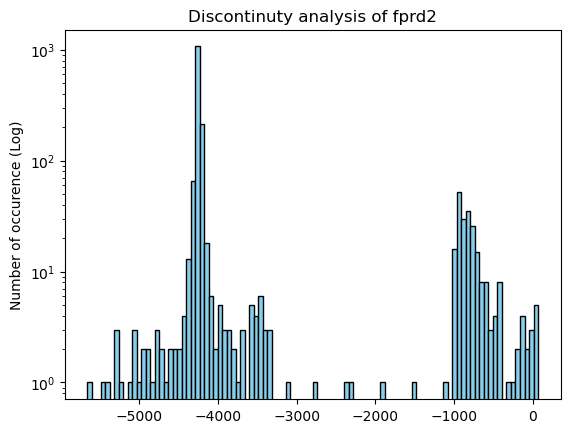

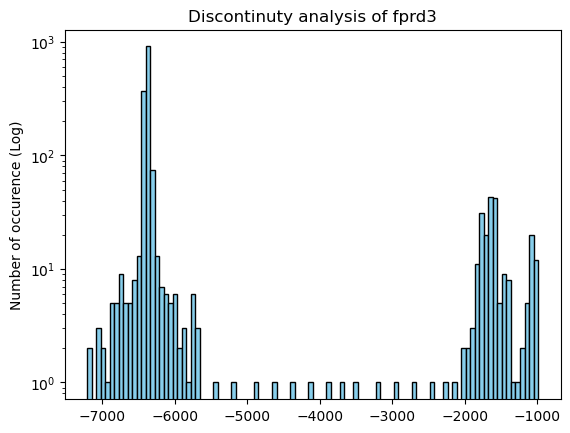

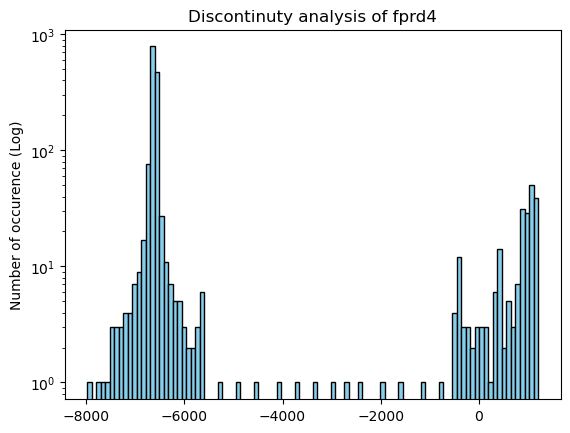

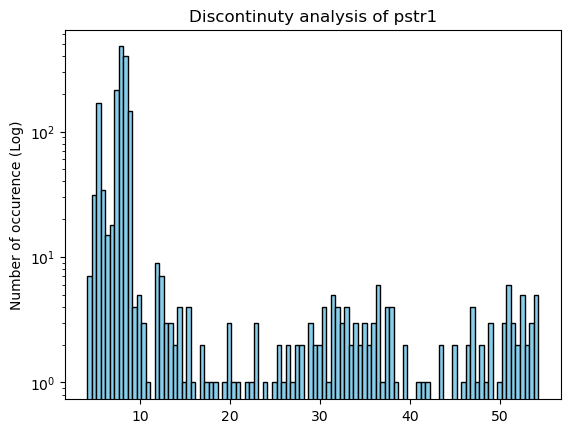

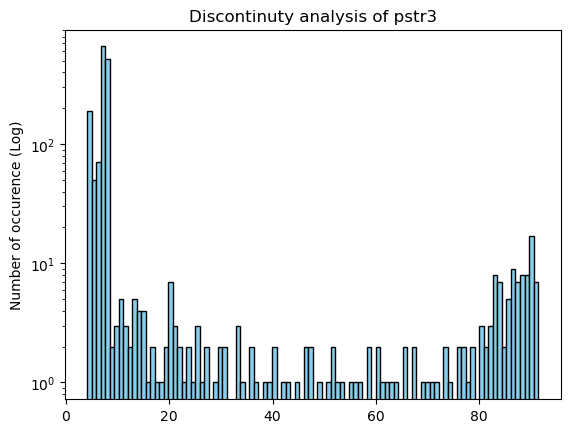

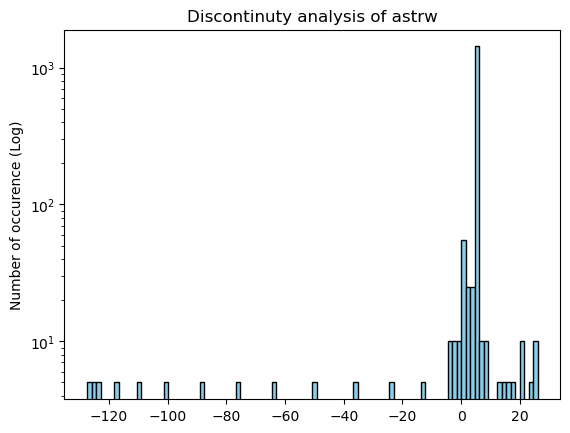

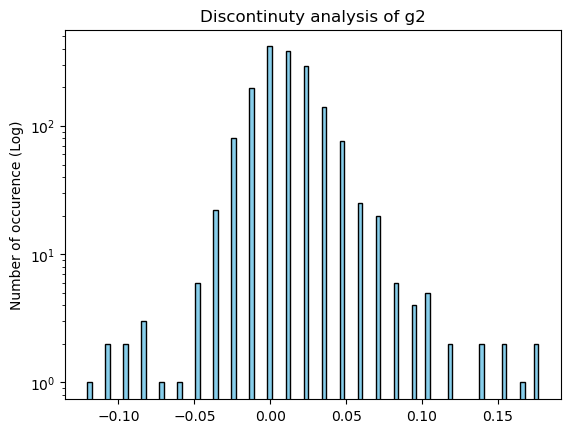

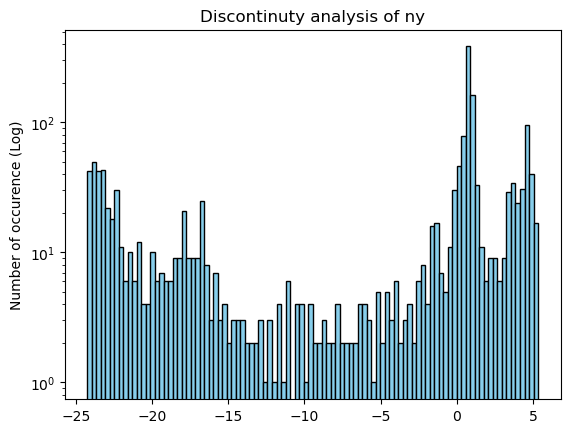

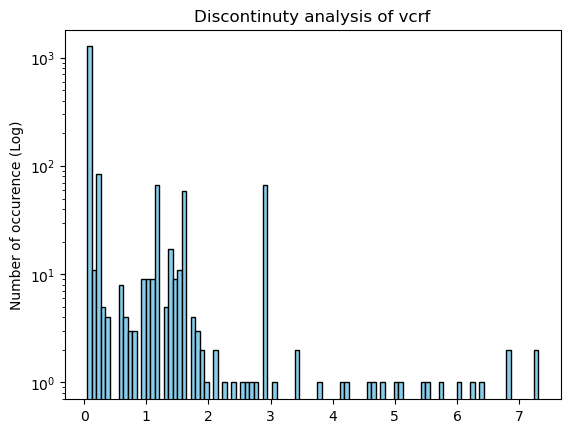

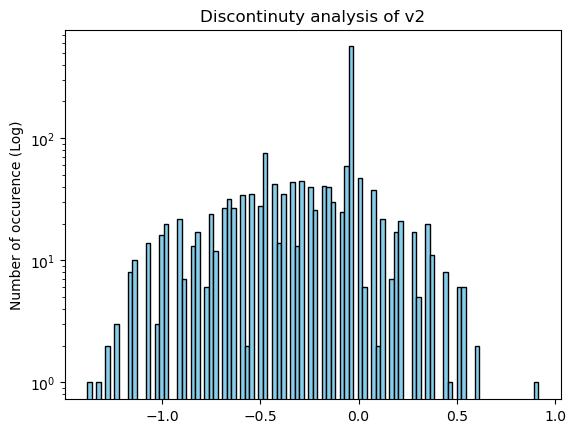

In [5]:
for i in df.columns[1:-1] :
    visualisation.plot_hist(df,i)

Discontinuité de temps: on devrait observer un trou car sans discontinuité on devrai avoir des rbins tous de même taille

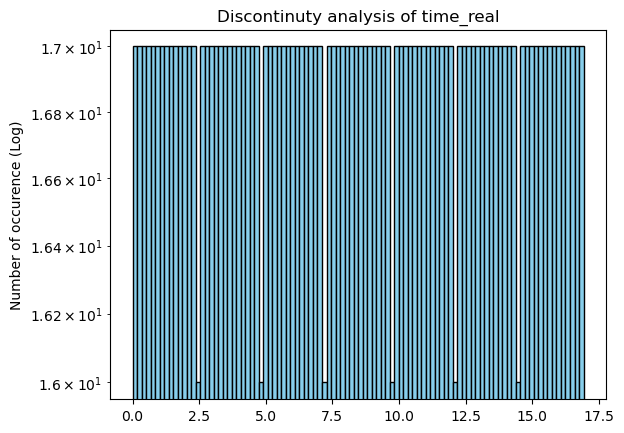

In [6]:
visualisation.plot_hist(df,"time_real")

# Affichage des boxplot des variable de chaque colonnes

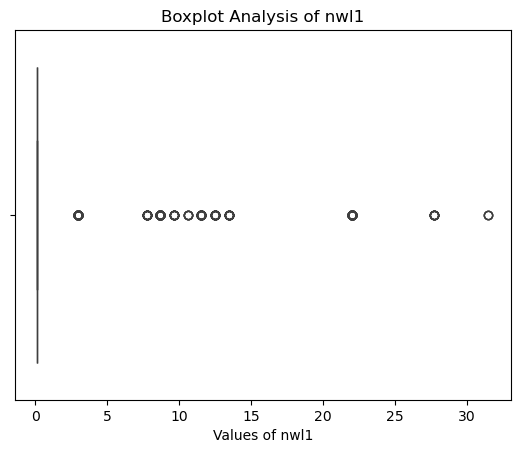

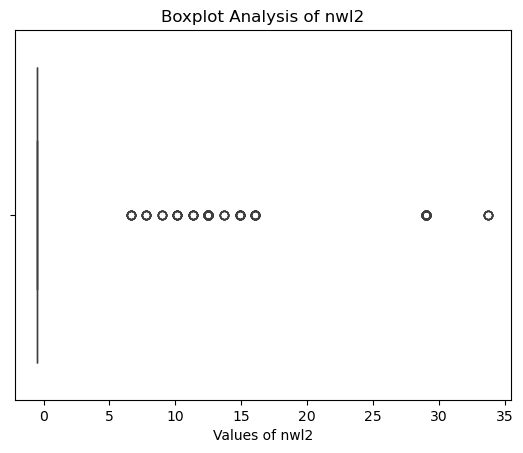

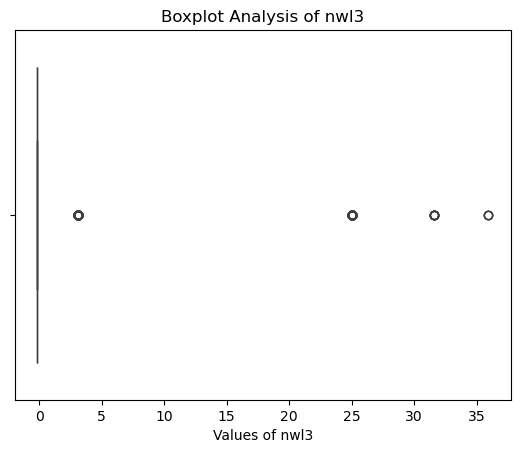

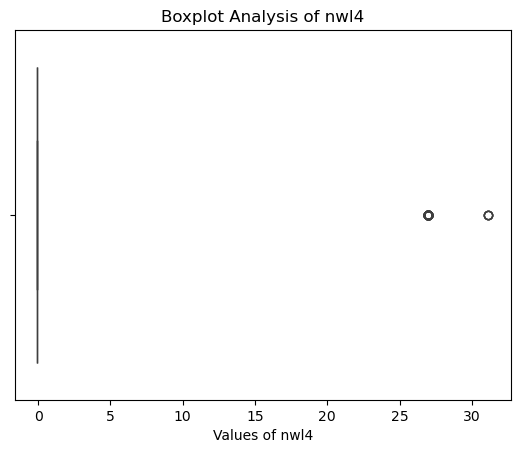

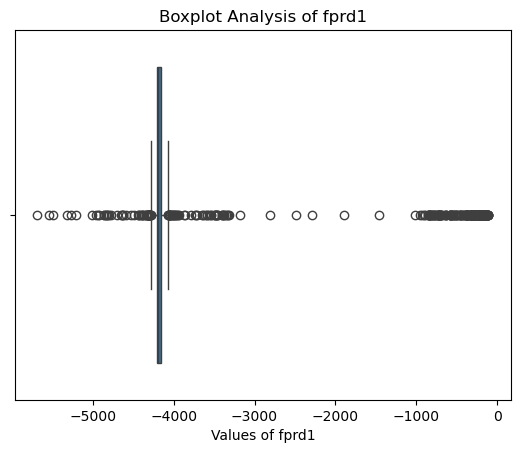

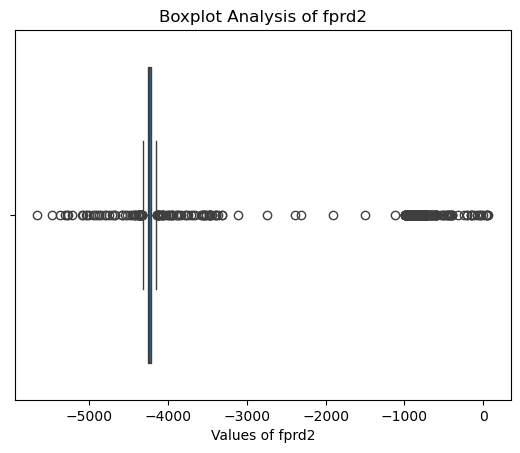

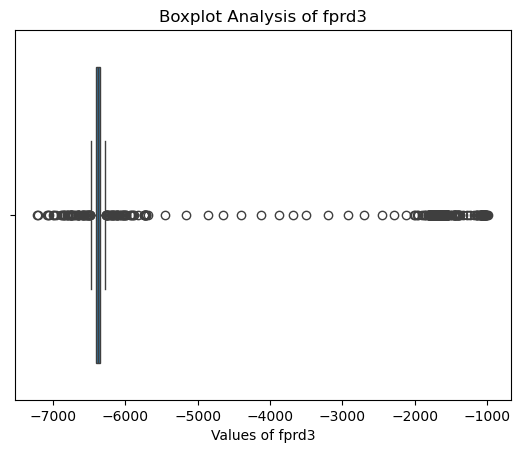

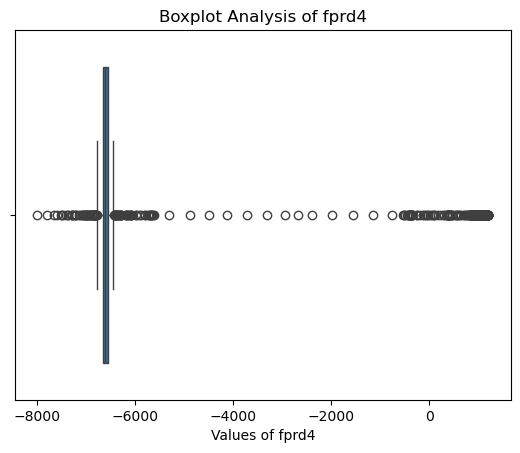

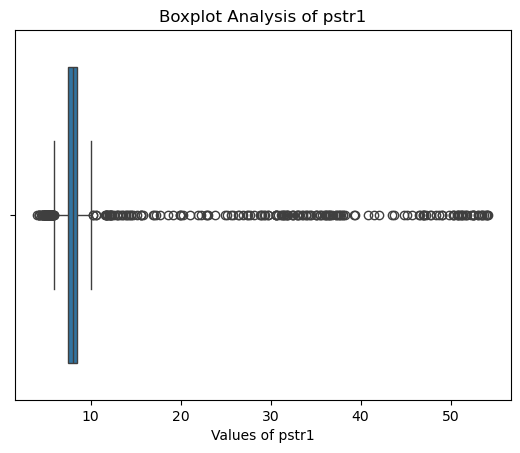

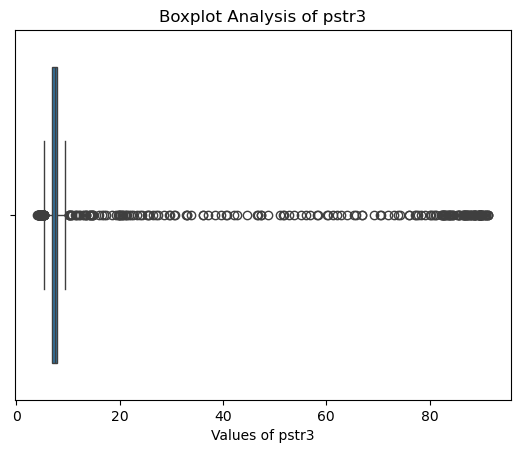

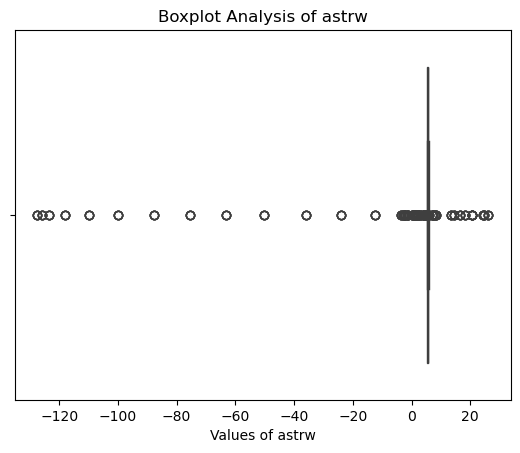

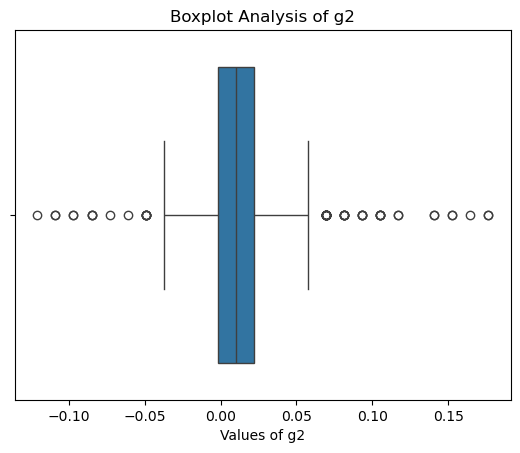

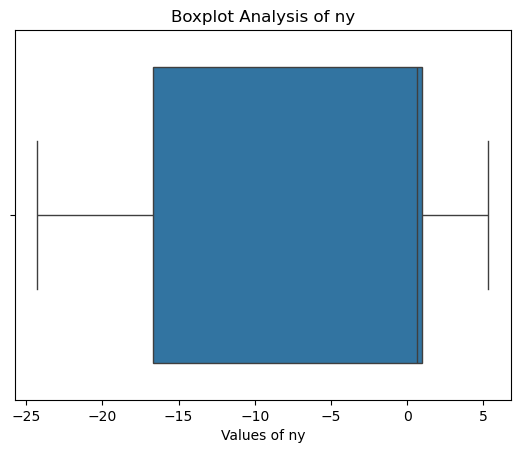

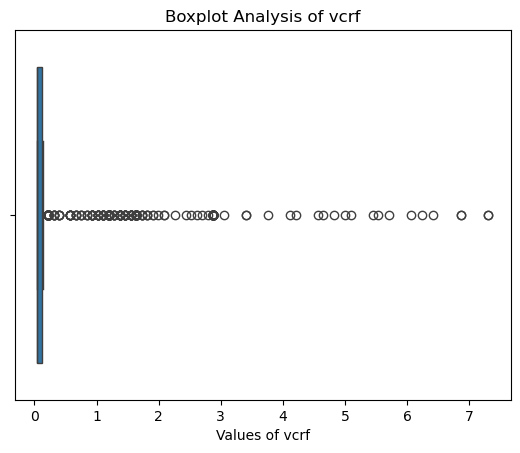

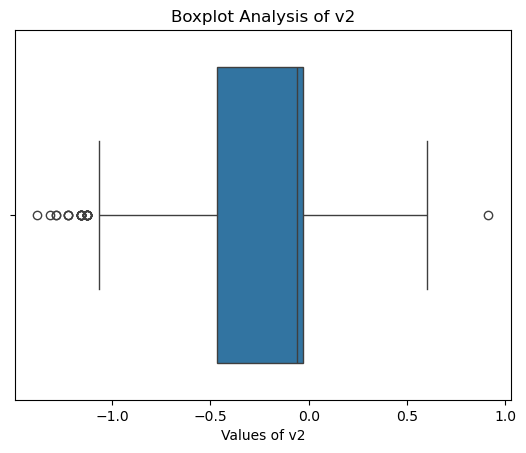

In [9]:
for i in df.columns[1:-1] :
   visualisation.boxplot(df,i)

La Médiane (Ligne centrale) : La valeur qui sépare les données en deux groupes égaux. Elle est plus robuste que la moyenne car elle n'est pas influencée par les erreurs extrêmes.

La Boîte (Interquartile - IQR) : Représente les 50% centraux des données (entre le 1er et le 3ème quartile). Une boîte étroite indique un capteur très stable.

Les Moustaches : Elles délimitent la zone de variabilité "normale" du capteur.

Les Outliers (Points isolés) : Tout point situé au-delà des moustaches est considéré comme une anomalie.